# 대한민국 헌법 형태소 분석

### 한글 지원

In [ ]:
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 데이터와 라이브러리 가져오기

In [54]:
# data/헌법.txt 가져오기
txt = open('data/헌법.txt', 'r', encoding='utf-8').read()

# 사용할 라이브러리 임포트
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
okt = Okt()

### 가장 많이 기술된 50개 단어 표시

In [61]:
# 명사만 추출
nouns = okt.nouns(txt)

words = [n for n in nouns if len(n) > 1] # 한 번만 등장한 단어 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

# 형태소분석기로 걸러지지 않은 '거나', '다만' 단어 제거
del c['거나']
del c['다만']

# 50개 단어 추출
for word, count in c.most_common(50):
    print(word, count)

법률 127
대통령 83
국가 73
국회 68
국민 61
헌법 52
모든 37
기타 26
사항 23
권리 21
의원 21
자유 20
정부 20
선거 20
임명 20
직무 19
국무총리 19
경제 18
의무 18
조직 18
국회의원 18
임기 18
의결 17
공무원 17
경우 17
이상 17
국무위원 17
대법원 17
범위 16
법관 15
보호 14
정책 14
정당 14
헌법재판소 14
재적 14
회의 14
항의 14
관리 14
노력 13
보장 13
요구 13
법원 12
집회 12
과반수 12
출석 12
찬성 12
조약 11
재판 11
동의 11
탄핵 11


### 시각화

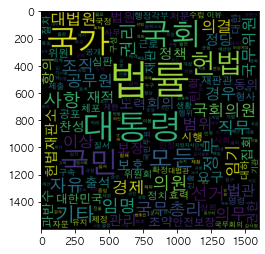

In [62]:
#워드클라우드 생성
wc = WordCloud(font_path='AppleGothic',width=800, height=800, scale=2.0, max_font_size=150)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)